In [338]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [339]:
#loading data

df = pd.read_csv('tn.movie_budgets.csv')

In [340]:
#dataset exploration
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [341]:
df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The data information shows that there are no missing values.

In [343]:
#changing all the currency values from objects to float

currency_cols = ['production_budget','domestic_gross','worldwide_gross']
for x in currency_cols:
    df[x] = df[x].astype(str).replace({'\$':'',',':''},regex = True)
    df[x] = df[x].astype(float)
    df[x] = df[x].round(0).astype(int)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [344]:
#check for duplicates

df.duplicated().sum()

0

There are no duplicated entries

In [345]:
#dropping rows where gross revenue is 0

df = df[df['worldwide_gross'] != 0]
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [346]:
#calculating the profit made by each movie
df['profit'] = (df['worldwide_gross'] - df['production_budget']).astype(int)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648,1722483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662


In [347]:
#calculating the return of investment for each movie
df['r_o_i'] = (((df['profit'])/df['production_budget'])*100).astype(int)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,r_o_i
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648,1722483648,405
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315
...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,923
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,-87
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,3908
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-73


In [348]:
#checking for outliers based on the r_o_i

Q1 = df['r_o_i'].quantile(0.25)  
Q3 = df['r_o_i'].quantile(0.75)  
IQR = Q3 - Q1  

#outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#outliers
outliers = df[(df['r_o_i'] < lower_bound) | (df['r_o_i'] > upper_bound)]
outliers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,r_o_i
42,43,"Dec 19, 1997",Titanic,200000000,659363944,-2147483648,1947483648,973
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,973
303,4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,115000000,474544677,1027044677,912044677,793
413,14,"Jul 13, 2012",Ice Age: Continental Drift,95000000,161321843,879765137,784765137,826
424,25,"May 30, 2003",Finding Nemo,94000000,380529370,936429370,842429370,896
...,...,...,...,...,...,...,...,...
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,2034928,29070
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,834926,11927
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,923
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,3908


In [349]:
# dropping outliers because they represent one off situations where a movie did really well or very poorly
df = df[(df['r_o_i'] >= lower_bound) & (df['r_o_i'] <= upper_bound)]
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,r_o_i
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648,1722483648,405
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315
...,...,...,...,...,...,...,...,...
5769,70,"Apr 1, 1996",Bang,10000,527,527,-9473,-94
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,10000,401,401,-9599,-95
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,-49
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,-87


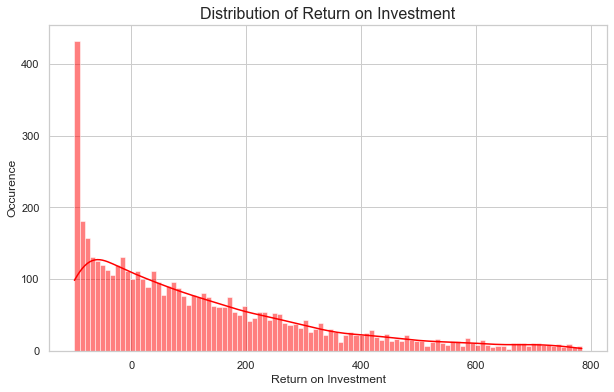

In [350]:
#checking the distribution of values using a kde plot

plt.figure(figsize = (10, 6))
sns.histplot(data=df, x='r_o_i', bins = 100, color = 'red', kde = True)
plt.title('Distribution of Return on Investment', fontsize=16)
plt.xlabel('Return on Investment', fontsize=12)
plt.ylabel('Occurence', fontsize=12)
plt.grid(True)
plt.show()

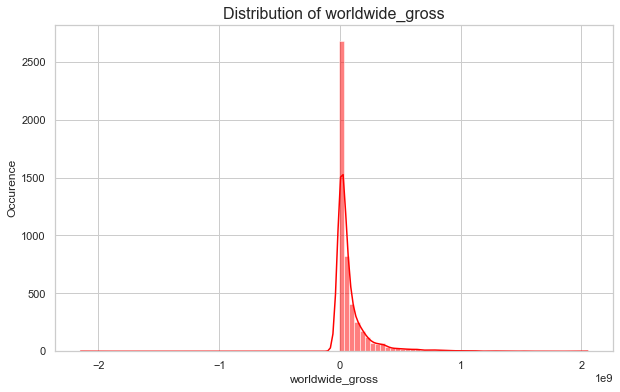

In [404]:
#checking the distribution of values using a kde plot


plt.figure(figsize = (10, 6))
sns.histplot(data=df, x='worldwide_gross', bins = 100, color = 'red', kde = True)
plt.title('Distribution of worldwide_gross', fontsize=16)
plt.xlabel('worldwide_gross', fontsize=12)
plt.ylabel('Occurence', fontsize=12)
plt.grid(True)
plt.show()

From the above distribution, it is clear that the return on investment is skewed to the right, indicating that a significant amount of movies end up with low r_o_i.

In [395]:
#using median to check for central tendency rather than mean due to the skew;
median_value = np.median(df['r_o_i'])
median_value

64.5

In [396]:
mean_value = np.mean(df['r_o_i'])
mean_value

120.49371706526145

In [402]:
mode_value = df['r_o_i'].mode()
mode_value

0   -99
dtype: int32

The median return on investment (ROI) is 64.5%, which is a positive indicator, suggesting that the majority of movies in the industry achieve at least a 100% return on their investment. Are there any notable trends that contribute to achieving high ROI? First let us find out how the industry has been performing over the decades.

In [352]:
#converting month and date into datetime

df['release_date'] = pd.to_datetime(df['release_date'])
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,r_o_i
0,1,2009-12-18,Avatar,425000000,760507625,-2147483648,1722483648,405
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-57
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315
...,...,...,...,...,...,...,...,...
5769,70,1996-04-01,Bang,10000,527,527,-9473,-94
5770,71,2008-08-14,The Rise and Fall of Miss Thang,10000,401,401,-9599,-95
5772,73,2012-01-13,Newlyweds,9000,4584,4584,-4416,-49
5776,77,2004-12-31,The Mongol King,7000,900,900,-6100,-87


In [353]:
#extracting months and years from the release date

df['month'] = df['release_date'].dt.month
df['year'] = df['release_date'].dt.year
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,r_o_i,month,year
0,1,2009-12-18,Avatar,425000000,760507625,-2147483648,1722483648,405,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-57,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315,12,2017
...,...,...,...,...,...,...,...,...,...,...
5769,70,1996-04-01,Bang,10000,527,527,-9473,-94,4,1996
5770,71,2008-08-14,The Rise and Fall of Miss Thang,10000,401,401,-9599,-95,8,2008
5772,73,2012-01-13,Newlyweds,9000,4584,4584,-4416,-49,1,2012
5776,77,2004-12-31,The Mongol King,7000,900,900,-6100,-87,12,2004


In [369]:
#creating a function for line plotting different parameters

def plot_line(col_name):
    years = df.groupby('year')[col_name].sum().reset_index()

    #visualising the time series
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=years, x='year', y=col_name, marker='o', color = 'red')
    plt.title(f'Year vs {col_name.capitalize()}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(col_name.capitalize(), fontsize=12)
    plt.grid(True)
    plt.show()

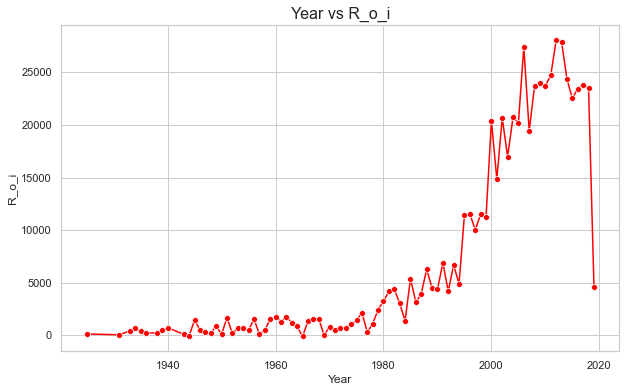

In [370]:
#line plot based on r_o_i
plot_line('r_o_i')

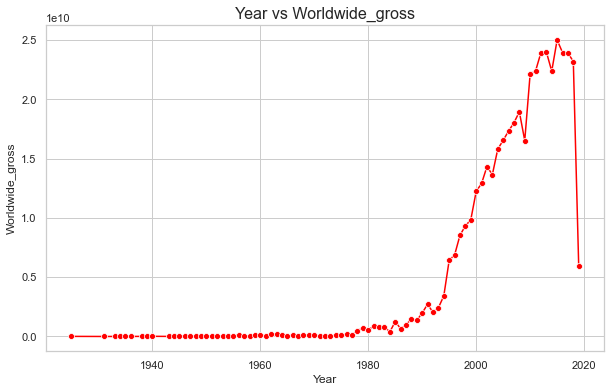

In [392]:
#line plot based on worldwide_gross


plot_line('worldwide_gross')

From the above plots, we can observe that the industry has grown increasingly popular from the 1980s through the 21st century. 
This trend shows a rising demand for movies, advancements in production, and the global expansion of the audience base. To solidify our deductions, let us investigate if the production budget increased over the years - rather is there a positive correlation between production budget and years?

In [371]:
#creating a function to check correlation between various parameters

def corre(x,y):
    correlation = df[x].corr(df[y])
    print(f'The correlation between {x} and {y} is: {correlation}')


In [373]:
#correlation between production budget and year

corre('production_budget', 'year')

The correlation between production_budget and year is: 0.18939895788938596


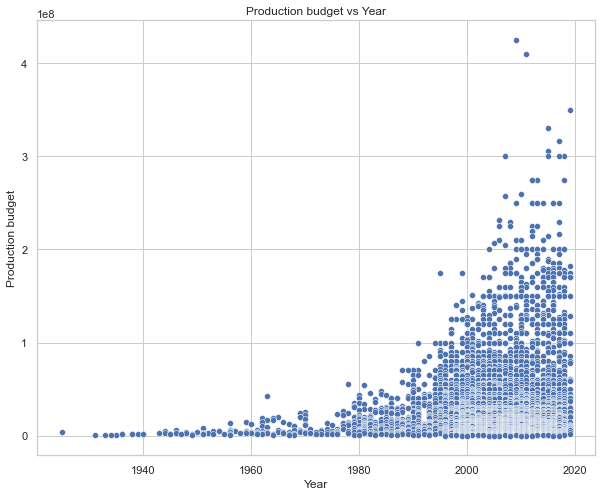

In [375]:
#visualising this correlation using a scatter plot

plt.figure(figsize=(10, 8))

# Scatter plot
sns.scatterplot(x=df['year'], y=df['production_budget'])

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Production budget")
plt.title("Production budget vs Year")

# Show the plot
plt.show()

We can clearly see that the production budget has been increasing over the years. This is may be because of the demand for high-quality visual effects and the continually advancing technology. With this insight, we can ask: Do higher production budgets result in higher revenue? Have the majority of movies with a high production budget accrued good revenue? Using a linear regression, we can be able to determine how much variance in the revenue can be accredited to the production budget.

In [382]:
#creating a function for doing regressions

def regression(a,b):
#defining variables

    X = df[a]
    y = df[b]

    #adding constant

    model = sm.OLS(endog = y, exog = sm.add_constant(X))

    #fitting

    results = model.fit()

    #evaluation of the results
    print(results.summary())

In [388]:
#regression between production_budget and r_o_i
regression(['production_budget'], 'worldwide_gross')

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     6773.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:26:28   Log-Likelihood:                -98331.
No. Observations:                4934   AIC:                         1.967e+05
Df Residuals:                    4932   BIC:                         1.967e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.516e+07   2.01e+0

Interpretation of the simple regression:
1. R-squared = 0.579 meaning that the variance of the revenue can be explained by the production budget 58% of the time. This shows there is a strong relationship between production budget and worldwide gross.
2. p-value =  0.00 which is less than 0.05 meaning that the model is statistically significant.
3. constant = -1.516e+07 means that when production budget is 0, estimated value of the revenue is -1.516e+07
4. coef = 2.9467 suggests that for every unit increase in the production budget, revenue increases by 2.9467 units.

The model confirms that higher production budgets are strongly associated with higher worldwide gross revenues. On average, every dollar spent on production results in an additional $2.95 in gross revenue.

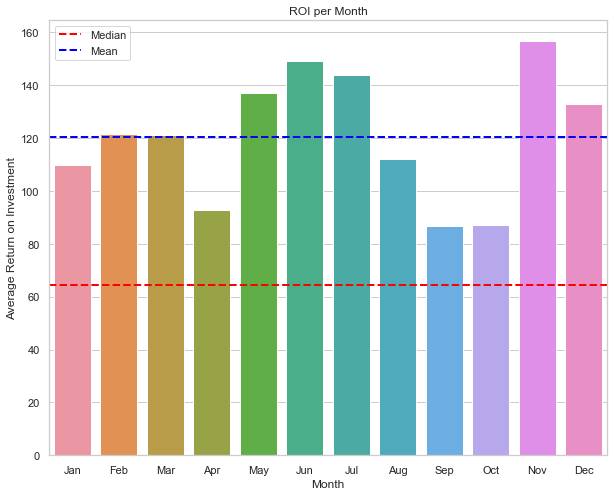

In [400]:
roi_per_month = df.groupby('month')['r_o_i'].mean().reset_index()

plt.figure(figsize=(10, 8))

# Bar plot
sns.barplot(x=roi_per_month['month'], y=roi_per_month['r_o_i'])

# Labels and Title
plt.xlabel("Month")
plt.ylabel("Average Return on Investment")
plt.title("ROI per Month")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#adding the line of central tendency
plt.axhline(median_value, color='red', linestyle='dashed', linewidth=2, label = 'Median')
plt.axhline(mean_value, color='blue', linestyle='dashed', linewidth=2, label = 'Mean')
plt.legend()

# Show the plot
plt.show()



The graph reveals a relatively even distribution, suggesting that no single month drastically influences ROI based on the release date. However, the industry appears to perform better than average during May, June, July, November, and December. Therefore, it may be advisable for the client to schedule their release dates during these months to maximize potential returns.

What percentage of the worldwide gross is foreign?

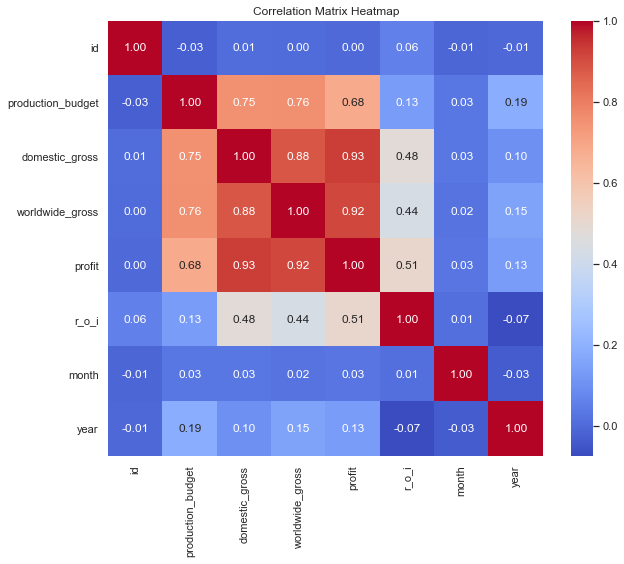

In [384]:
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Customize the plot
plt.title('Correlation Matrix Heatmap')
plt.show()